# Movies Data Analysis

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from matplotlib.font_manager import FontProperties


### Importing movies data

In [77]:
data= pd.read_csv("DataFiles/movies.csv")
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Check size of the data

In [78]:
data.shape

(7668, 15)

##### The data has 7668 movies and related details. (15 columns)

### List down the columns of the dataset to check all columns are relevant with proper names

In [79]:
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

##### all column names are perfect and no unncessary columns found

### Checking null values

In [80]:
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

###### Note:  There are no rows with all columns as null values
however, 11 columns have null values, but, the column that concern the analysis are score, votes, star, country.. 
Hence we need to remove the rows with these columns as null

### Drop rows that has  null values

In [81]:
data.dropna(subset=['score', 'votes','star','country'], inplace=True)
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [82]:
data.shape

(7661, 15)

#### After cleaning up the null value of the  columns score, votes, star and country, we have 7661 movies

### Checking data type of each column

In [83]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

###  Sorting movies based on score

In [84]:
data = data.sort_values("score",ascending=False)
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,House of the Dead,R,Action,2003,"October 10, 2003 (United States)",2.1,36000.0,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000.0,1.381818e+07,Boll Kino Beteiligungs GmbH & Co. KG,90.0
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000.0,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000.0,4.928883e+06,19 Entertainment,81.0
5354,The Hottie & the Nottie,PG-13,Comedy,2008,"February 21, 2008 (Russia)",1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,NaN,1.596232e+06,Purple Pictures,91.0
5306,Disaster Movie,PG-13,Comedy,2008,"August 29, 2008 (United States)",1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,3.481682e+07,Lionsgate,87.0


####  Top 100 movies based on score

In [85]:
data.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,Toy Story 3,G,Animation,2010,"June 18, 2010 (United States)",8.2,776000.0,Lee Unkrich,John Lasseter,Tom Hanks,United States,200000000.0,1.066971e+09,Walt Disney Pictures,103.0
6384,Bhaag Milkha Bhaag,Not Rated,Biography,2013,"July 12, 2013 (United States)",8.2,63000.0,Rakeysh Omprakash Mehra,Prasoon Joshi,Farhan Akhtar,India,NaN,1.755130e+07,Rakeysh Omprakash Mehra Pictures,186.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,2.340243e+07,Chartoff-Winkler Productions,129.0
3626,The Color of Paradise,PG,Drama,1999,"September 7, 2000 (Australia)",8.2,16000.0,Majid Majidi,Majid Majidi,Hossein Mahjoub,Iran,NaN,2.777552e+06,Varahonar Company,90.0


### Filtering only Movie name and score from top 100 and setting index

In [86]:
data_scorewise = data[['name','score']].set_index("name").head(100)
data_scorewise

,score
name,
The Shawshank Redemption,9.3
The Dark Knight,9.0
Schindler's List,8.9
Pulp Fiction,8.9
The Lord of the Rings: The Return of the King,8.9
...,...
Toy Story 3,8.2
Bhaag Milkha Bhaag,8.2
Raging Bull,8.2


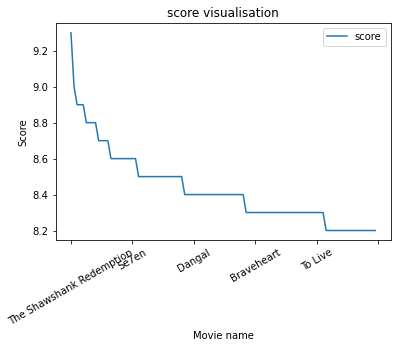

In [87]:
data_scorewise.plot(kind='line', title='score visualisation')
plt.xlabel('Movie name')
plt.ylabel('Score')
plt.xticks(rotation=30)
plt.show()

###  Calculate the average movie duration

In [88]:
data['runtime'].mean()

107.27118422770597

##### Average duration of the movies is 107.27

### Sort the movies by duration to find the shortest and longest movies

In [89]:
data.sort_values('runtime')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5985,Winnie the Pooh,G,Animation,2011,"July 15, 2011 (United States)",7.2,23000.0,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000.0,49871429.0,Walt Disney Pictures,63.0
1271,The Land Before Time,G,Animation,1988,"November 18, 1988 (United States)",7.4,82000.0,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000.0,84460846.0,Lucasfilm,69.0
3318,Following,R,Crime,1998,"November 5, 1999 (United Kingdom)",7.5,89000.0,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000.0,48482.0,Next Wave Films,69.0
4493,9 Songs,Not Rated,Drama,2004,"March 11, 2005 (United Kingdom)",4.8,22000.0,Michael Winterbottom,Michael Winterbottom,Kieran O'Brien,United Kingdom,NaN,1590308.0,Revolution Films,71.0
2381,Once Upon a Forest,G,Animation,1993,"June 18, 1993 (United States)",6.5,5200.0,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000.0,6582052.0,Hanna-Barbera Productions,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,Gettysburg,PG,Drama,1993,"October 8, 1993 (United States)",7.6,27000.0,Ron Maxwell,Michael Shaara,Tom Berenger,United States,25000000.0,10769960.0,TriStar Television,271.0
1218,Little Dorrit,G,Drama,1987,"October 21, 1988 (United States)",7.3,1000.0,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,NaN,1025228.0,Sands,357.0
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000.0,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,NaN,2799773.0,BiBi Film,366.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


### Create a histogram of duration

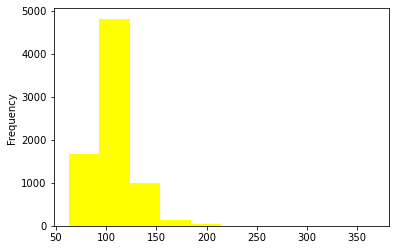

In [90]:
data['runtime'].plot(kind='hist', bins=10,color="yellow")
plt.show()

##### The histogram tell us, most of the movies have a duration approximately between 100-120 min

### Visualising the same data using box plot,  to  confirm the histogram result is correct

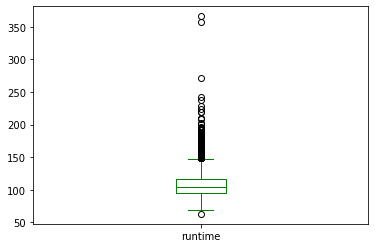

In [91]:
data['runtime'].plot(kind='box',color="green")
plt.show()

##### from the box plot, we can see the median (green line) and confirm the  histogram finding is correct

### Count the movies by rating

In [92]:
data[['rating','name']].groupby('rating').count()

,name
rating,
Approved,1
G,153
NC-17,23
Not Rated,283
PG,1252
PG-13,2112
R,3694
TV-14,1
TV-MA,9


### Visualising the above data


Text(0, 0.5, 'Movie Count')

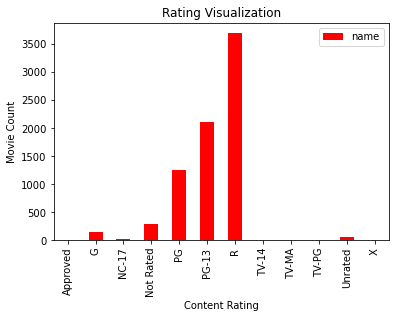

In [93]:
data[['rating','name']].groupby('rating').count().plot(kind='bar', title='Rating Visualization',color="Red")
plt.xlabel('Content Rating')
plt.ylabel('Movie Count')

In [94]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0


### Calculate the average score for movies 2 hours or longer, and compare that with the average score for movies shorter than 2 hours

In [95]:
print('Avg. score for movies 2 hours or longer: ', data[data['runtime'] >= 120]['score'].mean(), 
 '\nAvg. score for movies shorter than 2 hours: ', data[data['runtime'] < 120]['score'].mean())

Avg. score for movies 2 hours or longer:  7.02940789473684 
Avg. score for movies shorter than 2 hours:  6.23248086007497


###### movies with longer duration has higher rarting

### Calculate the average duration for each genre


In [96]:
data_genrewise  = data[['runtime','genre']].groupby('genre').mean()
data_genrewise

,runtime
genre,
Action,110.223136
Adventure,107.978923
Animation,92.204142
Biography,119.880361
Comedy,101.491759
Crime,111.752727
Drama,112.964993
Family,99.909091
Fantasy,99.363636


### Visualize the relationship between rating and duration

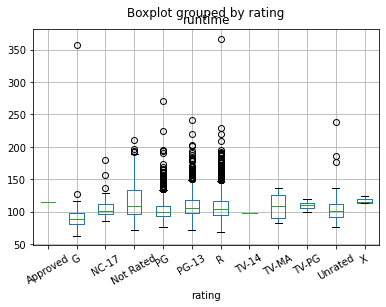

In [97]:
data.boxplot(column='runtime', by='rating')
plt.xticks(rotation=30)
plt.show()

##### movies with duration above 100 min get rating eaiser

### Determine the top rated movie (by score) for each genre

In [98]:

data.sort_values('score', ascending=False).groupby('genre')['name','score'].first()

,name,score
genre,,
Action,The Dark Knight,9.0
Adventure,Interstellar,8.6
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Parasite,8.6
Crime,Pulp Fiction,8.9
Drama,The Shawshank Redemption,9.3
Family,E.T. the Extra-Terrestrial,7.8
Fantasy,Dark City,7.6


The first keyword is used to get the first value from a list/array or any sort of storage list type

### Check if there are multiple movies with the same name, and if so, determine if they are actually duplicates

In [99]:
result = data[data['name'].isin(data[data.duplicated(['name'])]['name'])]
result.sort_values('name')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
4995,After the Wedding,R,Drama,2006,"May 11, 2007 (United States)",7.7,33000.0,Susanne Bier,Susanne Bier,Mads Mikkelsen,Denmark,NaN,1.163272e+07,Zentropa Entertainments,120.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2.790019e+06,Sony Pictures Classics,112.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,Venom,R,Horror,2005,"September 16, 2005 (United States)",4.6,9700.0,Jim Gillespie,Flint Dille,Agnes Bruckner,United States,NaN,8.817790e+05,Dimension Films,87.0
1812,Where the Heart Is,R,Comedy,1990,"February 23, 1990 (United States)",6.0,1500.0,John Boorman,Telsche Boorman,Dabney Coleman,United States,15000000.0,1.106475e+06,Touchstone Pictures,107.0
3708,Where the Heart Is,PG-13,Comedy,2000,"April 28, 2000 (United States)",6.7,32000.0,Matt Williams,Lowell Ganz,Natalie Portman,United States,15000000.0,4.086372e+07,Twentieth Century Fox,120.0
6035,Wuthering Heights,Not Rated,Drama,2011,"November 11, 2011 (United Kingdom)",6.0,9700.0,Andrea Arnold,Andrea Arnold,Kaya Scodelario,United Kingdom,NaN,1.742215e+06,Film4,129.0


### Calculate the average score for each genre, but only include genres with at least 10 movies

In [100]:
genres = data['genre'].value_counts()[data['genre'].value_counts() > 10].index
data[data['genre'].isin(genres)].groupby('genre')['score'].mean()

genre
Action       6.202817
Adventure    6.291569
Animation    6.769231
Biography    7.030926
Comedy       6.193987
Crime        6.673455
Drama        6.694257
Family       6.363636
Fantasy      6.006818
Horror       5.750156
Mystery      6.665000
Thriller     5.912500
Name: score, dtype: float64

### Top 5 countries with highest budget on movies

In [101]:
data_countrywise = data[["country","budget","gross","votes"]]
data_countrywise1 = data_countrywise.groupby(['country']).sum().sort_values("budget",ascending=False).head()
data_countrywise1


,budget,gross,votes
country,,,
United States,1.616655e+11,4.834588e+11,520647110.0
United Kingdom,1.653452e+10,4.895020e+10,68535229.0
Germany,3.344750e+09,6.218591e+09,11025300.0
France,3.304500e+09,8.499480e+09,15613358.0
Canada,2.544677e+09,6.075292e+09,8742104.0


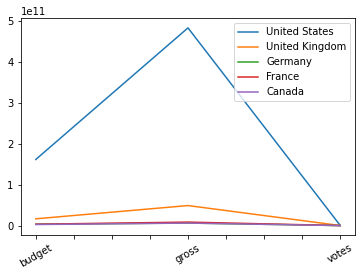

In [102]:
data_countrywise1.loc["United States"].plot()
data_countrywise1.loc["United Kingdom"].plot()
data_countrywise1.loc["Germany"].plot()
data_countrywise1.loc["France"].plot()
data_countrywise1.loc["Canada"].plot()
plt.xticks(rotation=30)
plt.legend()
plt.show()

#### from the above plot, it can be seen that,  among the top 5 countries with highest budget, United States has far ahead from others

### Budget vs Gross comparison in Top 5 countries

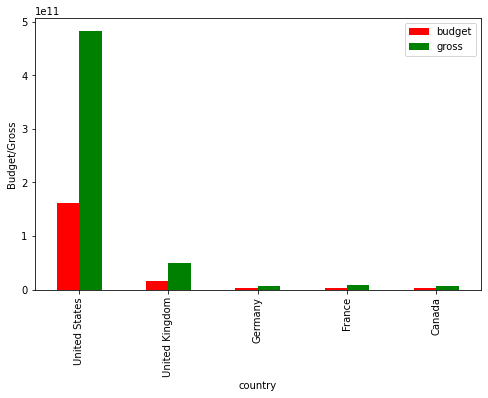

In [103]:
data_countrywise1 = data_countrywise1.sort_values("budget",ascending=False)
data_countrywise1[["budget","gross"]].plot.bar(color=["red","green"],figsize=(8,5))
plt.ylabel("Budget/Gross")
plt.show()

#### From the above bar chart, it is understood that the more budget give better success of movies

## Machine Learning

#### Lets check the data

In [104]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0


### Lets check the null values

In [105]:
data.isna().sum()

name           0
rating        73
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           0
country        0
budget      2169
gross        183
company       13
runtime        2
dtype: int64

#### rating has 73 null values, budget has 2169 null values, gross has 183 null values, company and runtime has 13 and 2 null values respectively. Name and budget can be ignored, as we are not taking these columns for training. However, rating is important and hence we need to find a way to replace the null values. 

### Lets check what are the values in rating

In [106]:
data.groupby("rating").size()


rating
Approved        1
G             153
NC-17          23
Not Rated     283
PG           1252
PG-13        2112
R            3694
TV-14           1
TV-MA           9
TV-PG           5
Unrated        52
X               3
dtype: int64

### From the above values, we can use "Not Rated" and replace it with null

In [107]:
data[['rating']] = data[['rating']].fillna(value='Not Rated')

### We can also have "Unrated" which can be replaced with "Not Rated". SImilarly, TV-14 is equal to PG-13, TV-MA is equal to R, TV-PG is PG, X is NC-17, Approved is G .. Lets replace all these

In [108]:
data["rating"].replace({"Unrated": "Not Rated","TV-14":"PG-13","TV-MA":"R","TV-PG":"PG","X":"NC-17","Approved":"G"}, inplace=True)

In [109]:
data.groupby("rating").size()

rating
G             154
NC-17          26
Not Rated     408
PG           1257
PG-13        2113
R            3703
dtype: int64

### Lets remove rows which has null values in runtime and gross 

In [110]:
data = data.dropna(subset=['runtime', 'gross'])

In [111]:
data.shape

(7477, 15)

In [112]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [113]:
data.isna().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           0
country        0
budget      2043
gross          0
company       10
runtime        0
dtype: int64

In [114]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0


#### Finally, we have much cleaner data. 

### From the data, let predict the score of a movie by uisng the features of the movies using Machine algorithms. Since the score values are regressive, we will be using one of Supervised Learning regression model. 

### Regression Plots

In [115]:
data_top = data.head(50)

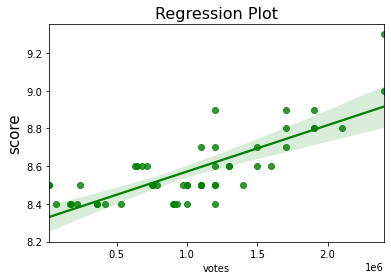

In [116]:
sns.regplot(y=data_top['score'],x=data_top['votes'],color="green")
plt.title('Regression Plot',size=16)
plt.ylabel('votes',size=14)
plt.ylabel('score',size=15)
plt.show()


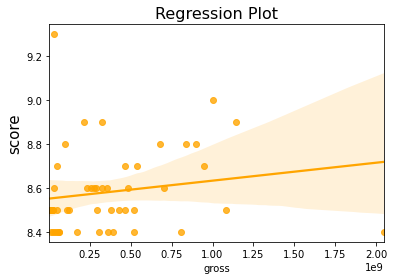

In [117]:
sns.regplot(y=data_top['score'],x=data_top['gross'],color="orange")
plt.title('Regression Plot',size=16)
plt.ylabel('gross',size=14)
plt.ylabel('score',size=15)
plt.show()

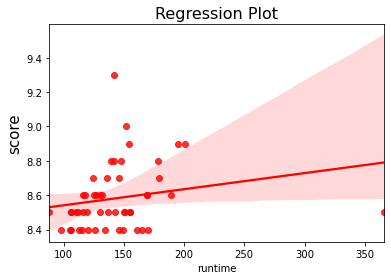

In [118]:
sns.regplot(y=data_top['score'],x=data_top['runtime'],color="red")
plt.title('Regression Plot',size=16)
plt.ylabel('runtime',size=14)
plt.ylabel('score',size=15)
plt.show()

### To apply a regression model, we first need to seggregate Independent variable (X) and dependent variable (Y)

In [119]:
X = data[['rating', 'genre', 'year', 'released',  'votes',
       'director', 'star', 'country', 'gross',
       'runtime']]
X.head()

,rating,genre,year,released,votes,director,star,country,gross,runtime
2443,R,Drama,1994,"October 14, 1994 (United States)",2400000.0,Frank Darabont,Tim Robbins,United States,2.881729e+07,142.0
5243,PG-13,Action,2008,"July 18, 2008 (United States)",2400000.0,Christopher Nolan,Christian Bale,United States,1.005974e+09,152.0
2247,R,Biography,1993,"February 4, 1994 (United States)",1200000.0,Steven Spielberg,Liam Neeson,United States,3.221612e+08,195.0
2444,R,Crime,1994,"October 14, 1994 (United States)",1900000.0,Quentin Tarantino,John Travolta,United States,2.139288e+08,154.0
4245,PG-13,Action,2003,"December 17, 2003 (United States)",1700000.0,Peter Jackson,Elijah Wood,New Zealand,1.146031e+09,201.0


In [120]:
Y=data.iloc[:,5]
Y

2443    9.3
5243    9.0
2247    8.9
2444    8.9
4245    8.9
       ... 
4342    2.1
4412    2.1
5354    1.9
5306    1.9
4594    1.9
Name: score, Length: 7477, dtype: float64

### Categorical Data
#### Since our values have somany categorical values (label or text), lets use an encoder to convert those to numerical values. Here we are using get_dummies method of pandas

In [134]:
#X=pd.get_dummies(X)
#X

#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

### Splitting the dataset

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [136]:
X_train

,year,votes,gross,runtime,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,...,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_West Germany,country_Yugoslavia
4111,2002,4700.0,234255.0,115.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4073,2002,266000.0,197079546.0,112.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7536,2019,48000.0,21360215.0,111.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1887,1991,33000.0,47624353.0,97.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2390,1993,5700.0,3902679.0,98.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,2017,6200.0,60330833.0,99.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3504,1999,33000.0,46112640.0,137.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4659,2005,403000.0,562363449.0,187.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7136,2017,79000.0,56996304.0,132.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [137]:
X_test

,year,votes,gross,runtime,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,...,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_West Germany,country_Yugoslavia
4713,2005,84000.0,49334775.0,135.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5969,2011,61000.0,5728213.0,109.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92,1981,905000.0,389925971.0,115.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3981,2001,28000.0,28008462.0,109.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6324,2013,33000.0,9757417.0,95.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,1998,972000.0,264118201.0,103.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3137,1997,21000.0,15738769.0,90.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
957,1986,6600.0,320256.0,85.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6647,2015,539000.0,156480177.0,168.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [138]:
Y_train

array([41, 48, 44, ..., 52, 48, 48])

In [126]:
Y_test

4713    6.7
5969    7.1
92      8.4
3981    6.2
6324    6.7
       ... 
3247    8.1
3137    5.8
957     5.7
6647    7.8
7600    5.9
Name: score, Length: 1870, dtype: float64

In [139]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Using Linear Regression Algorithm to train

In [140]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [141]:
accuracy = regressor.score(X_train,Y_train)
"Accuracy: {}%".format(int(round(accuracy*100)))

'Accuracy: 100%'

In [142]:
Y_pred = regressor.predict(X_test)

In [143]:
Y_pred 

array([64.92054872, 43.74782365, 64.83762656, ..., 34.72168365,
       44.21904319, 51.69913051])

In [144]:
Y_test

array([47, 51, 64, ..., 37, 58, 39])

In [151]:
#Train the model using train data
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 0)
regressor.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [149]:
accuracy = regressor.score(X_train,Y_train)
"Accuracy: {}%".format(int(round(accuracy*100)))

'Accuracy: 100%'

In [152]:
Y_pred = regressor.predict(X_test)
Y_pred

array([56, 43, 49, ..., 36, 53, 53])